In [3]:
# All the imports and packages used
import pandas as pd 
import researchpy as rp
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy

# Read the dataset
full_dataset = pd.read_csv('Full_dataset.csv')

# Check for differences in people with low or high general trust

In [17]:
df1 = pd.DataFrame({'ID': full_dataset['ProlifiID'],
    'General_trust' : (full_dataset['Q24'] + full_dataset['Q25'] + full_dataset['Q26']) / 3,
                     'Perceived_trust' : (pd.to_numeric(full_dataset['q_1']) + pd.to_numeric(full_dataset['q_2'])) / 2})

### Dropping the extra rows for each participants

In [18]:
df1_1 = df1.drop_duplicates(subset=['ID'], keep='first')


In [19]:
low_generaltrust = df1_1[df1_1['General_trust'] < 4]
low_mean = low_generaltrust['Perceived_trust'].mean()
low_mean

2.8947368421052633

In [20]:
high_generaltrust = df1_1[df1_1['General_trust'] > 7]
high_mean = high_generaltrust['Perceived_trust'].mean()
high_mean

3.3472222222222223

In [21]:
med_generaltrust = df1_1[(df1_1['General_trust'] > 4) & (df1_1['General_trust'] < 7)]
med_mean = med_generaltrust['Perceived_trust'].mean()
med_mean

3.022222222222222

## Check for diffreneces in peoples age

In [26]:
df_age = pd.DataFrame({'PROLIFIC_PID': full_dataset['ProlifiID'],
                    'age' : full_dataset['age'],
    'General_trust' : (full_dataset['Q24'] + full_dataset['Q25'] + full_dataset['Q26']) / 3,
                     'Perceived_trust' : (pd.to_numeric(full_dataset['q_1']) + pd.to_numeric(full_dataset['q_2'])) / 2})

df_age = df_age.drop_duplicates(subset=['PROLIFIC_PID'], keep='first')

### The differences in perceived trust

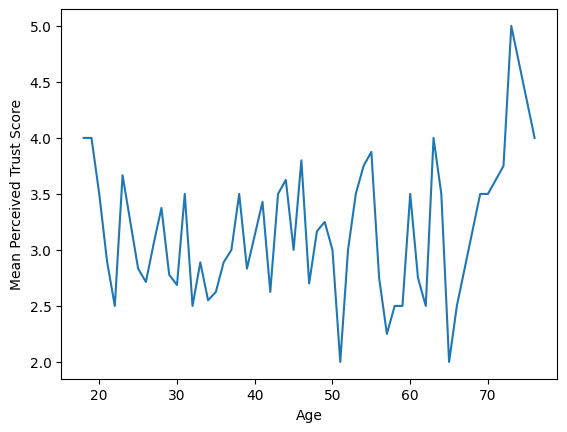

In [28]:
import matplotlib.pyplot as plt

# Group the data by age and calculate the mean trust score for each age group
age_groups = df_age.groupby('age')['Perceived_trust'].mean().reset_index()

# Create the line plot
plt.plot(age_groups['age'], age_groups['Perceived_trust'])

# Add labels to the x and y axes
plt.xlabel('Age')
plt.ylabel('Mean Perceived Trust Score')

# Show the plot
plt.show()

### The differences in general trust

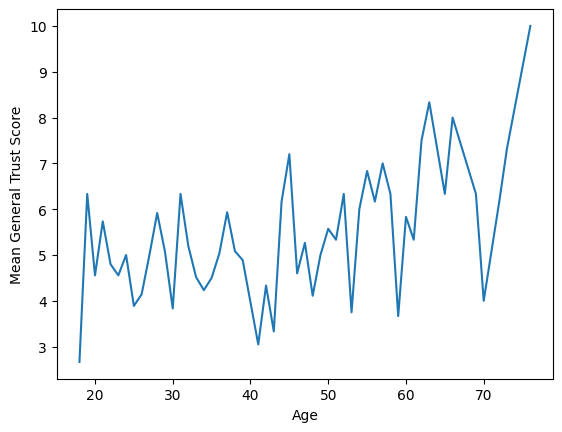

In [29]:
import matplotlib.pyplot as plt

# Group the data by age and calculate the mean trust score for each age group
age_groups = df_age.groupby('age')['General_trust'].mean().reset_index()

# Create the line plot
plt.plot(age_groups['age'], age_groups['General_trust'])

# Add labels to the x and y axes
plt.xlabel('Age')
plt.ylabel('Mean General Trust Score')

# Show the plot
plt.show()

## Check for the trust of the people who uses social media as their primary source for news

In [32]:
df_socialm = pd.DataFrame({'PROLIFIC_PID': full_dataset['ProlifiID'],
                    'age' : full_dataset['age'],
                    'socialm' : full_dataset['socialm'],
    'General_trust' : (full_dataset['Q24'] + full_dataset['Q25'] + full_dataset['Q26']) / 3,
                     'Perceived_trust' : (pd.to_numeric(full_dataset['q_1']) + pd.to_numeric(full_dataset['q_2'])) / 2})

df_socialm = df_socialm.drop_duplicates(subset=['PROLIFIC_PID'], keep='first')


### Those who ranked social media as number 1 for their news consumption

In [46]:
sm1 = df_socialm[df_socialm['socialm'] == 1]
sm1_mean = sm1['Perceived_trust'].mean()
sm1_mean

3.142857142857143

In [47]:
sm1_mean1 = sm1['General_trust'].mean()
sm1_mean1

4.928571428571429

### Those who ranked social media as number 5 for their news consumption


In [48]:
NOTsm1 = df_socialm[df_socialm['socialm'] == 5]
NOTsm1_mean = NOTsm1['Perceived_trust'].mean()
NOTsm1_mean

2.9150943396226414

In [49]:
NOTsm1_mean1 = NOTsm1['General_trust'].mean()
NOTsm1_mean1

5.150943396226414